## Importing the Libraries

In [14]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
os.chdir('C:\Application of Software')

In [16]:
os.getcwd()

'C:\\Application of Software'

## Read the Excel File

In [17]:
RM = pd.ExcelFile('Exhibit+1.xlsx')
RM

In [18]:
rm = pd.read_excel('Exhibit+1.xlsx', 'Sheet1')

In [19]:
rm.head()

,Rocinante 36,Unnamed: 1,Unnamed: 2,Marengo 32,Unnamed: 4,Unnamed: 5
0,Car No.,Mileage (km/ltr),Top speed (km/hr),Car No.,Mileage (km/ltr),Top speed (km/hr)
1,1,21.2,151.9,1,15.04,211.3
2,2,21.79,147.6,2,15.41,207
3,3,21.87,145.6,3,15.43,206.2
4,4,22.71,136.1,4,15.92,213.4


## EDA

In [20]:
rm.shape

(21, 6)

In [21]:
list(rm)

['Rocinante 36',
 'Unnamed: 1',
 'Unnamed: 2',
 'Marengo 32',
 'Unnamed: 4',
 'Unnamed: 5']

In [22]:
rm.isnull().any().sum()

0

## Rename the columns

In [23]:
rm = rm.rename(columns={
    'Unnamed: 1' : 'Mileage_R36',
    'Unnamed: 2': 'Top_speed_R36',
    'Unnamed: 4' : 'Mileage_M32',
    'Unnamed: 5': 'Top_speed_M32'})
rm

,Rocinante 36,Mileage_R36,Top_speed_R36,Marengo 32,Mileage_M32,Top_speed_M32
0,Car No.,Mileage (km/ltr),Top speed (km/hr),Car No.,Mileage (km/ltr),Top speed (km/hr)
1,1,21.2,151.9,1,15.04,211.3
2,2,21.79,147.6,2,15.41,207
3,3,21.87,145.6,3,15.43,206.2
4,4,22.71,136.1,4,15.92,213.4
5,5,22.52,139.7,5,15.2,204.2
6,6,21.41,146.1,6,15.22,208.7
7,7,22.71,139.6,7,14.6,200
8,8,21.71,143,8,14.41,210.9
9,9,19.95,136.4,9,14.79,208.5


## Droping the first row

In [24]:
rm = rm.drop(index=0).reset_index(drop=True)

In [25]:
rm

,Rocinante 36,Mileage_R36,Top_speed_R36,Marengo 32,Mileage_M32,Top_speed_M32
0,1,21.2,151.9,1,15.04,211.3
1,2,21.79,147.6,2,15.41,207
2,3,21.87,145.6,3,15.43,206.2
3,4,22.71,136.1,4,15.92,213.4
4,5,22.52,139.7,5,15.2,204.2
5,6,21.41,146.1,6,15.22,208.7
6,7,22.71,139.6,7,14.6,200
7,8,21.71,143,8,14.41,210.9
8,9,19.95,136.4,9,14.79,208.5
9,10,20.65,146.6,10,14.81,214.2


## Subsetting for Rocinate 36 Model 

In [26]:
R36= rm[['Rocinante 36','Mileage_R36','Top_speed_R36']]
R36

,Rocinante 36,Mileage_R36,Top_speed_R36
0,1,21.2,151.9
1,2,21.79,147.6
2,3,21.87,145.6
3,4,22.71,136.1
4,5,22.52,139.7
5,6,21.41,146.1
6,7,22.71,139.6
7,8,21.71,143
8,9,19.95,136.4
9,10,20.65,146.6


In [27]:
from scipy import stats

## Q-1) Formulate the null and alternative hypotheses for mileage and top speed to check whether the new models are performing as per the desired design specifications.

## Rocinate 36 
### H0: Milage = 22km/l, top speed = 140km/hr
### H1: Milage ≠ 22km/l, top speed ≠ 140km/hr
## Marengo 32
### H0: Milage = 15km/l, top speed = 210km/hr
### H1: Milage ≠ 15km/l, top speed ≠ 210km/hr

## Q-2) In order to comment on whether or not the design specifications are being matched, perform relevant hypothesis tests and calculate the p-values for each model. What will you conclude? Assume that you are performing the tests at a 95% confidence level.
 


## One sample T-test for Rocinate Model 

In [28]:
population_mean_Mileage_R36 = 22  
population_mean_Top_speed_R36 = 140

In [29]:
t_stat_Mileage_R36, p_value_Mileage_R36 = stats.ttest_1samp(R36['Mileage_R36'], population_mean_Mileage_R36)
t_stat_top_Top_speed_R36, p_value_Top_speed_R36 = stats.ttest_1samp(R36['Top_speed_R36'], population_mean_Top_speed_R36)

ValueError: data type <class 'numpy.object_'> not inexact

## This error has occured as the data type is in Object. So it should be converted to float type to apply the function

In [30]:
print(R36.dtypes)

Rocinante 36     object
Mileage_R36      object
Top_speed_R36    object
dtype: object


## Changing the data type of the variables from object to float

In [31]:
R36['Mileage_R36'] = pd.to_numeric(R36['Mileage_R36'], errors='coerce')
R36

C:\Users\user\AppData\Local\Temp\ipykernel_11368\1600563823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R36['Mileage_R36'] = pd.to_numeric(R36['Mileage_R36'], errors='coerce')


,Rocinante 36,Mileage_R36,Top_speed_R36
0,1,21.20,151.9
1,2,21.79,147.6
2,3,21.87,145.6
3,4,22.71,136.1
4,5,22.52,139.7
5,6,21.41,146.1
6,7,22.71,139.6
7,8,21.71,143
8,9,19.95,136.4
9,10,20.65,146.6


In [32]:
print(R36.dtypes)

Rocinante 36      object
Mileage_R36      float64
Top_speed_R36     object
dtype: object


In [33]:
R36['Top_speed_R36'] = pd.to_numeric(R36['Top_speed_R36'], errors='coerce')
R36

C:\Users\user\AppData\Local\Temp\ipykernel_11368\156301483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R36['Top_speed_R36'] = pd.to_numeric(R36['Top_speed_R36'], errors='coerce')


,Rocinante 36,Mileage_R36,Top_speed_R36
0,1,21.20,151.9
1,2,21.79,147.6
2,3,21.87,145.6
3,4,22.71,136.1
4,5,22.52,139.7
5,6,21.41,146.1
6,7,22.71,139.6
7,8,21.71,143.0
8,9,19.95,136.4
9,10,20.65,146.6


In [34]:
print(R36.dtypes)

Rocinante 36      object
Mileage_R36      float64
Top_speed_R36    float64
dtype: object


## Reapplying the function for One- sample t-test

In [35]:
t_stat_Mileage_R36, p_value_Mileage_R36 = stats.ttest_1samp(R36['Mileage_R36'], population_mean_Mileage_R36)
t_stat_Top_speed_R36, p_value_Top_speed_R36 = stats.ttest_1samp(R36['Top_speed_R36'], population_mean_Top_speed_R36)

In [36]:
print(f"One-sample t-test for Mileage_R36: t-statistic = {t_stat_Mileage_R36}, p-value = {p_value_Mileage_R36}")
print(f"One-sample t-test for Top_Speed_R36: t-statistic = {t_stat_Top_speed_R36}, p-value = {p_value_Top_speed_R36}")

One-sample t-test for Mileage_R36: t-statistic = -1.8350746065984094, p-value = 0.08220024707686456
One-sample t-test for Top_Speed_R36: t-statistic = 0.803602305363553, p-value = 0.43156615071637905


## Result
### Both the milage and top speed have the p-value > than 0.05 hence we accept the null hypothesis i.e. the given milage and top speed claimed by the random motors is true for the Rocinate 36 model

## Subsetting for Marengo 32 Model 

In [37]:
M32= rm[['Marengo 32','Mileage_M32','Top_speed_M32']]
M32

,Marengo 32,Mileage_M32,Top_speed_M32
0,1,15.04,211.3
1,2,15.41,207
2,3,15.43,206.2
3,4,15.92,213.4
4,5,15.2,204.2
5,6,15.22,208.7
6,7,14.6,200
7,8,14.41,210.9
8,9,14.79,208.5
9,10,14.81,214.2


In [38]:
print(M32.dtypes)

Marengo 32       object
Mileage_M32      object
Top_speed_M32    object
dtype: object


## Changing the data type from object to float

In [39]:
M32['Mileage_M32'] = pd.to_numeric(M32['Mileage_M32'], errors='coerce')
M32
M32['Top_speed_M32'] = pd.to_numeric(M32['Top_speed_M32'], errors='coerce')
M32

C:\Users\user\AppData\Local\Temp\ipykernel_11368\1455539259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M32['Mileage_M32'] = pd.to_numeric(M32['Mileage_M32'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_11368\1455539259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M32['Top_speed_M32'] = pd.to_numeric(M32['Top_speed_M32'], errors='coerce')


,Marengo 32,Mileage_M32,Top_speed_M32
0,1,15.04,211.3
1,2,15.41,207.0
2,3,15.43,206.2
3,4,15.92,213.4
4,5,15.20,204.2
5,6,15.22,208.7
6,7,14.60,200.0
7,8,14.41,210.9
8,9,14.79,208.5
9,10,14.81,214.2


In [40]:
print(M32.dtypes)

Marengo 32        object
Mileage_M32      float64
Top_speed_M32    float64
dtype: object


## One sample t-test for the marengo 32 model

In [41]:
population_mean_Mileage_M32 = 15 
population_mean_Top_speed_M32 = 210

In [42]:
t_stat_Mileage_M32, p_value_Mileage_M32 = stats.ttest_1samp(M32['Mileage_M32'], population_mean_Mileage_M32)
t_stat_Top_speed_M32, p_value_Top_speed_M32 = stats.ttest_1samp(M32['Top_speed_M32'], population_mean_Top_speed_M32)

In [43]:
print(f"One-sample t-test for Mileage_M32: t-statistic = {t_stat_Mileage_M32}, p-value = {p_value_Mileage_M32}")
print(f"One-sample t-test for Top_Speed_M32: t-statistic = {t_stat_Top_speed_M32}, p-value = {p_value_Top_speed_M32}")

One-sample t-test for Mileage_M32: t-statistic = 1.5644592519493412, p-value = 0.13421298678380816
One-sample t-test for Top_Speed_M32: t-statistic = 0.9124445171733968, p-value = 0.3729676712183989


## Result
### Both the milage and top speed have the p-value > than 0.05 hence we accept the null hypothesis i.e. the given milage and top speed claimed by the random motors is true for the Marengo 32 model

## Q-3) You have already learnt about the possible errors that might result from hypothesis tests. Which type of error is more expensive for Random Motors, and why? Assume that you need to refund the money to all your customers if your cars do not deliver the promised specifications.

### H0:                        TRUE                                        FALSE
### Reject:       Type 1 Error(α)                         Correct Decision (1-β)
### Accept:      Correct Decision (1-α)            Type 2 Error (β)

## Answer
### Type 2 Error will be more expensive to the Random Motors because if the H0 is false and they accept it then the cars might not perform as expected and they have to refund the complete money to the consumers, but if the H0 is true and not accepted then the company might loose on some business but there wont be any issues with the expected performance of the cars. In type 1 errornot only they will loose the money but they can also face the issue of reputation and company brand image if the cars do not perform well.


## Q-4) Develop a regression equation for each model at a 95% confidence level. Using the regression equation, predict the sales of the two models. State the hypothesis assumption for the overall test and individual variables.
### Sub-questions: 
### a)	Overall significance of regression and significance of individual variables
### b)	Predict the sales at specified price, mileage and top speed for both models
### c)	Increase the input values by 5% and check the sales
### d)	Decrease the input values by 5% and check the sales 
### Assumptions:
### a)	Error term is normally distributed with mean 0 and constant variance
### b)	Input variables are independent of each other xi#xj ( VIF)
### c)	Successive error term is independent 
### d)	Specification bias

### Find out outliers in independent variables(hat-diagonal) and outliers in dependent(studentized residuals) variable [ Rocinate : check what is R2 is before excluding outliers (in x and y variables) and after removing outliers ]


## Importing the sales and price data set 

In [44]:
os.chdir('C:\Application of Software')
RM1 = pd.ExcelFile('Exhibit+2.xlsx')
RM1

In [45]:
Rmodel = pd.read_excel(RM1, 'Rocinante Models')
Mmodel= pd.read_excel(RM1, 'Marengo Models')

## EDA for Rocinate model

In [46]:
Rmodel.head()

,Cars,"Sales \n(in 1,000 units)",Price\n(in lakh rupees),Mileage\n(Km/ltr),Top speed (Km/hr)
0,Rocinante 1,171.877,6.1,15.8,168.2
1,Rocinante 2,139.796,6.1,12.1,149.6
2,Rocinante 3,178.947,9.9,17.0,173.4
3,Rocinante 4,140.022,5.8,11.6,170.6
4,Rocinante 5,186.476,10.0,17.2,175.0


In [47]:
Rmodel.shape

(35, 5)

In [48]:
Rmodel.isnull().any().sum()

0

In [49]:
import statsmodels.api as sm

## Fitting a MLR line for Rocinate Model 

In [50]:
y = Rmodel['Sales \n(in 1,000 units)']
x = Rmodel[['Price\n(in lakh rupees)','Mileage\n(Km/ltr)','Top speed (Km/hr)']]

In [51]:
x = sm.add_constant(x)

In [52]:
modelR = sm.OLS(y,x).fit()

In [53]:
modelR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Sales 
(in 1,000 units)   R-squared:                       0.996
Model:                                 OLS   Adj. R-squared:                  0.995
Method:                      Least Squares   F-statistic:                     2430.
Date:                     Sat, 26 Oct 2024   Prob (F-statistic):           7.45e-37
Time:                             17:44:17   Log-Likelihood:                -76.809
No. Observations:                       35   AIC:                             161.6
Df Residuals:                           31   BIC:                             167.8
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     50.7231      5.292      9.585      0.000      39.930      61.516
Price
(in lakh rupees)    -0.7950      0.254     -3.126      0.004      -1.314      -0.276
Mileage
(Km/ltr)           8.3063      0.100     82.913      0.000       8.102       8.511
Top speed (Km/hr)         -0.0186      0.031     -0.608      0.548      -0.081       0.044
==============================================================================
Omnibus:                        2.817   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                2.103
Skew:                           0.600   Prob(JB):                        0.349
Kurtosis:                       3.030   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The overall R square value is high i.e 0.996 hence the independent variables explain 99% of variation in the dependent variabe
## A high F-value of 2430 implies that the independent variables in the model collectively explain a significant portion of the variance in the dependent variable.
 ## The p value for the individual variable is >0.05 for top speed hence we accept the null hypothesis for top speed i.e it does not have significant impact on sales whereas the price and milage with p-value < 0.05 have a significant impact on the sales

## The regression equation for the Rocinate model will be 

### Sales = 50.7231 - 0.7950* Price + 8.3063* Milage - 0.0186* Top speed

## Predicting sales for rocinate model at specified values

In [54]:
### Sales of Rocinate model 
Sales= 50.7231 - 0.7950 * 7 +8.3063 * 22  - 0.0186 * 140
print(Sales)

225.2927


### Therefore the Rocinate model is expected to sell around 225 units at specified price

In [55]:
## Sales of Rocinate model after increasing the input values by 5%
Sales= 47.7800 - 0.7829 * (7*1.05) +8.2945 * (22*1.05)- 0.0186 * (140*1.05)
print(Sales)

230.89443500000002


### After increasing the values by 5 % the sales is expected to raise to 230 units

In [56]:
## Sales of Rocinate model after decreasing the input values by 5%
Sales= 47.7800 - 0.7829 * (7*0.95) +8.2945 * (22*0.95)- 0.0186 * (140*0.95)
print(Sales)

213.45496499999996


### After decreasing the values by 5 % the sales is expected to reduce to 213 units

## Diagnostic test for assumptions of Rocinate model

## Test for Heteroscadasticity

In [57]:
# Test of Heteroscedasticiy
# Breushpagan test
# H0: Homoschedastic
# H1: Heteroshcedastic

In [58]:
import statsmodels.stats.api as sms

In [59]:
modelR.resid

0    -2.112592
1    -3.805617
2    -1.892511
3     0.725065
4     4.084441
5     3.591028
6    -0.738284
7    -1.882010
8     0.154904
9    -1.010470
10   -0.028807
11    1.231004
12    3.926112
13   -1.587584
14   -0.930190
15   -1.176160
16   -3.549065
17    0.955025
18    3.093481
19   -0.651290
20    1.831553
21    1.942193
22    5.609616
23   -3.126691
24    0.665759
25   -1.958606
26   -0.256932
27   -0.982664
28    0.601384
29    0.453293
30   -0.709917
31    0.942835
32   -1.054848
33   -0.033380
34   -2.320076
dtype: float64

In [60]:
lm, pval, f_stat, f_pval = sms.het_breuschpagan(modelR.resid,x)

In [61]:
lm, pval, f_stat, f_pval

(1.7884283456542343,
 0.6174562893155056,
 0.5564453989339865,
 0.6477238758220805)

### Result
### Since both the LM p-value (0.617) and the F p-value (0.648) are higher than 0.05, there is no statistically significant evidence of heteroscedasticity in the residuals. This supports the assumption of homoscedasticity, meaning the variances of the errors are likely to be constant.

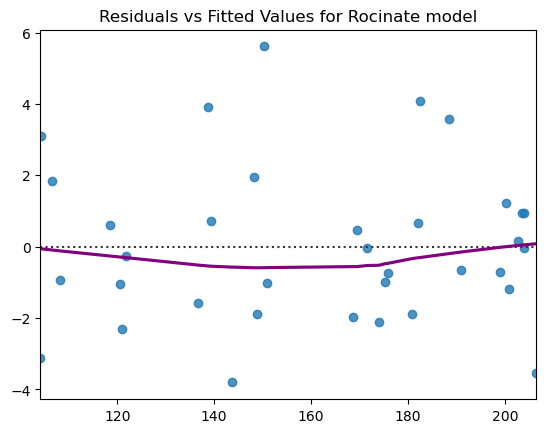

AttributeError: 'OLSResults' object has no attribute 'resids'

In [62]:
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan

# Residuals vs. fitted values plot
fitted_values = modelR.fittedvalues
sns.residplot(x=fitted_values, y=modelR.resid, lowess=True, line_kws={'color': 'purple'})
plt.title('Residuals vs Fitted Values for Rocinate model')
plt.show()

# Breusch-Pagan test
bp_test = het_breuschpagan(modelR.resids, model.model.exog)
print(f'Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}')

## Test for Normality

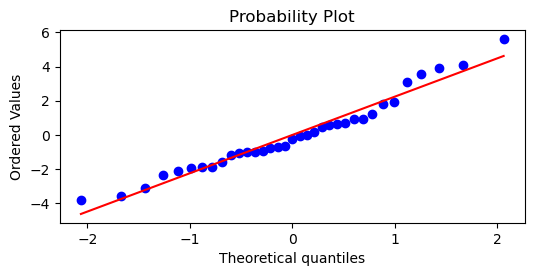

In [63]:
Since both the LM p-value (0.617) and the F p-value (0.648) are higher than 0.05, there is no statistically significant evidence of heteroscedasticity in the residuals. This supports the assumption of homoscedasticity, meaning the variances of the errors are likely to be constant.

C:\Users\user\AppData\Local\Temp\ipykernel_11368\2502637606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modelR.resid, hist=True, kde=True);


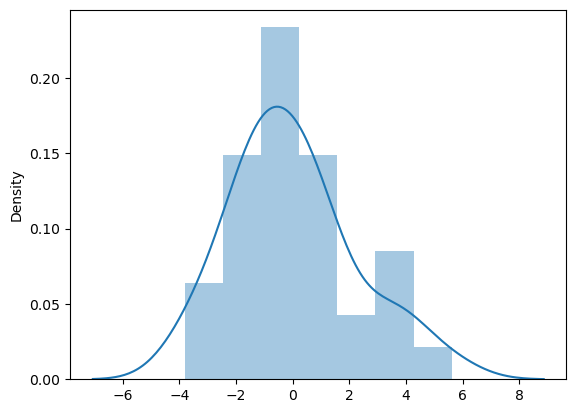

In [64]:
sns.distplot(modelR.resid, hist=True, kde=True);

## The above plot indicates that the residuals are almost normally distributed 

In [71]:
from scipy.stats import shapiro, kstest, anderson

In [72]:
# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(modelR.resid)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat}, p-value = {shapiro_p}")

# Kolmogorov-Smirnov Test
# (We assume residuals are tested against a normal distribution with mean 0 and standard deviation 1)
ks_stat, ks_p = kstest(modelR.resid, 'norm', args=(modelR.resid.mean(), modelR.resid.std()))
print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat}, p-value = {ks_p}")

# Anderson-Darling Test
ad_result = anderson(modelR.resid, dist='norm')
print(f"Anderson-Darling Test: Statistic = {ad_result.statistic}")
print("Critical values:", ad_result.critical_values)
print("Significance levels:", ad_result.significance_level)

Shapiro-Wilk Test: Statistic = 0.9628714919090271, p-value = 0.2783476710319519
Kolmogorov-Smirnov Test: Statistic = 0.10379500585351331, p-value = 0.8079916500238932
Anderson-Darling Test: Statistic = 0.46069275127986486
Critical values: [0.527 0.6   0.719 0.839 0.998]
Significance levels: [15.  10.   5.   2.5  1. ]


### As the p-value of Shapiro-Wilk Test and Kolmogorov-Smirnov Test is > 0.05 hence we fail to reject the null hypothesis therefore the data is normally distributed
### Also the t-statistics of the Anderson-Darling Test is less that the critical value at 5 % level of significance i.e. 0.719 hence it proves the normality 

## Test for Multicolleniarity

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
x.values

array([[  1. ,   6.1,  15.8, 168.2],
       [  1. ,   6.1,  12.1, 149.6],
       [  1. ,   9.9,  17. , 173.4],
       [  1. ,   5.8,  11.6, 170.6],
       [  1. ,  10. ,  17.2, 175. ],
       [  1. ,   6.5,  17.6, 173.1],
       [  1. ,   5.5,  16. , 184.6],
       [  1. ,   8.4,  13. , 175.7],
       [  1. ,   6.6,  19.3, 166.7],
       [  1. ,   8.8,  13.3, 175.4],
       [  1. ,   9.5,  15.8, 150.9],
       [  1. ,   9.2,  19.2, 140.5],
       [  1. ,   8.1,  11.7, 150.2],
       [  1. ,   5.4,  11.2, 146.2],
       [  1. ,   5.6,   7.8, 151.2],
       [  1. ,   6.3,  19. , 143.2],
       [  1. ,   5.8,  19.7, 178.9],
       [  1. ,   7.7,  19.5, 168.2],
       [  1. ,   7.2,   7.5, 164.7],
       [  1. ,   8.4,  18.1, 182.7],
       [  1. ,   8.4,   7.9, 165.7],
       [  1. ,   5.7,  12.6, 137. ],
       [  1. ,   5.5,  12.9, 173.9],
       [  1. ,   8.4,   7.6, 165.1],
       [  1. ,   5.6,  16.7, 160.1],
       [  1. ,   9.9,  15.5, 155.6],
       [  1. ,   6.2,   9.5, 155.4],
 

In [67]:
x.shape[1]

4

In [68]:
x.columns

Index(['const', 'Price\n(in lakh rupees)', 'Mileage\n(Km/ltr)',
       'Top speed (Km/hr)'],
      dtype='object')

In [69]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif_factor,features
0,184.048148,const
1,1.042167,Price\n(in lakh rupees)
2,1.076662,Mileage\n(Km/ltr)
3,1.041262,Top speed (Km/hr)


### The  VIF factor for all the variables except the intercept is < 5 hence they are free from multicollniarity 

## Test for Auto-correlation

In [73]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation
dw_stat = durbin_watson(modelR.resid)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.6547723984064442


### The Durbin-Watson statistic is 1.654 suggests that there is slightly positive to no autocorrelation in the residuals

## Test for specification bias

In [74]:
from statsmodels.stats.outliers_influence import reset_ramsey

# Ramsey RESET test
reset_test = reset_ramsey(modelR, degree=3)
print(f'Ramsey RESET test statistic: {reset_test.fvalue}, p-value: {reset_test.pvalue}')

Ramsey RESET test statistic: 0.1800797051113392, p-value: 0.8361304418861749


### Since the p-value is higher than 0.05, it suggests that the model is correctly specified, and there are no serious specification errors.

## Hat Diagonal Test

In [76]:
# Get the influence measures (hat diagonal)
influence = modelR.get_influence()
hat_values = influence.hat_matrix_diag

# Set a threshold for identifying high-leverage points (rule of thumb: 2*(k+1)/n, where k = number of predictors)
n = len(Rmodel)
k = x.shape[1] - 1  # number of predictors excluding the intercept
leverage_threshold = 2 * (k + 1) / n

# Identify high-leverage points
high_leverage_points = np.where(hat_values > leverage_threshold)[0]

print(f"High leverage points or (outliers in X): {high_leverage_points}")

High leverage points or (outliers in X): []


### The output indicates that there are no high leverage points in the dataset,the range of predictor values is relatively uniform

## Studentized residual test

In [78]:
# Get studentized residuals
studentized_residuals = influence.resid_studentized_external

# Set a threshold for identifying outliers in Y (commonly used threshold: |residual| > 3)
student_residuals_threshold = 3

# Identify outliers in the dependent variable
outliers_in_y = np.where(np.abs(studentized_residuals) > student_residuals_threshold)[0]

print(f"Outliers in Y or (studentized residuals): {outliers_in_y}")

Outliers in Y or (studentized residuals): []


### The output indicates that there are no outliers in the response variable(Y)

## EDA for Marengo Model 

In [79]:
Mmodel.head()

,Cars,"Sales \n(in 1,000 units)",Price\n(in lakh rupees),Mileage\n(Km/ltr),Top speed (Km/hr)
0,Marengo 1,20.896,42.5,9.3,199.4
1,Marengo 2,31.048,36.0,9.7,235.2
2,Marengo 3,29.904,54.7,16.6,240.8
3,Marengo 4,28.792,42.7,11.7,232.5
4,Marengo 5,16.776,44.9,13.7,188.8


In [80]:
Mmodel.shape

(31, 5)

In [81]:
Mmodel.isnull().any().sum()

0

## Fitting a MLR for Marengo Model 

In [82]:
y = Mmodel['Sales \n(in 1,000 units)']
x = Mmodel[['Price\n(in lakh rupees)','Mileage\n(Km/ltr)','Top speed (Km/hr)']]

In [83]:
x = sm.add_constant(x)
modelM = sm.OLS(y,x).fit()
modelM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Sales 
(in 1,000 units)   R-squared:                       0.863
Model:                                 OLS   Adj. R-squared:                  0.848
Method:                      Least Squares   F-statistic:                     56.74
Date:                     Sat, 26 Oct 2024   Prob (F-statistic):           8.74e-12
Time:                             18:15:04   Log-Likelihood:                -67.757
No. Observations:                       31   AIC:                             143.5
Df Residuals:                           27   BIC:                             149.2
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -13.4476      4.454     -3.019      0.005     -22.586      -4.309
Price
(in lakh rupees)    -0.1867      0.055     -3.368      0.002      -0.300      -0.073
Mileage
(Km/ltr)           0.0413      0.207      0.200      0.843      -0.383       0.465
Top speed (Km/hr)          0.2208      0.017     12.820      0.000       0.185       0.256
==============================================================================
Omnibus:                        2.082   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.181
Skew:                          -0.071   Prob(JB):                        0.554
Kurtosis:                       2.054   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The overall R square value is high i.e 0.863 hence the independent variable explain 86% of variation in the dependent variabe
 ## The p value for the individual variable is >0.05 for milage hence we accept the null hypothesis for milage i.e it does not have significant impact on sales whereas the price and top speed with p-value < 0.05 have a significant impact on the sales
## A F-value of 56.74 implies that the independent variables in the model collectively explain a significant portion of the variance in the dependent variable.

### The regression equation for the Marengo model will be
### Sales= -13.4476 -0.1867 * Price +0.0413 *Milage  + 0.2208 *Top speed

## Predicting Sales for Marengo Model at speified value

In [84]:
## Sales for Marengo model at specified value 
Sales= -13.4476 -0.1867 * 41 +0.0413 * 15 + 0.2208 * 210
print(Sales)

25.8852


### Therefore the Marengo model is expected to sell around 25 units at specified price

In [85]:
## Sales of Marengo model after increasing the input values by 5%
Sales= -13.4476 -0.1867 * (41*1.05) +0.0413 * (15*1.05) + 0.2208 * (210*1.05)
print(Sales)

27.85184


### After increasing the values by 5 % the sales is expected to raise to 27 units

In [86]:
## Sales of Marengo model after decreasing the input values by 5%
Sales= -13.4476 -0.1867 * (41*0.95) +0.0413 * (15*0.95) + 0.2208 * (210*0.95)
print(Sales)

23.91856


### After decreasing the values by 5 % the sales is expected to reduce to 23 units

## Diagnostic Test for assumptions of Marengo Model 

## Test for Homoscadasticity

In [87]:
# Test of Heteroscedasticiy
# Breushpagan test
# H0: Homoschedastic
# H1: Heteroshcedastic

In [88]:
modelM.resid

0    -2.132360
1    -1.115314
2    -0.288965
3    -1.606673
4    -3.645440
5    -2.063662
6    -0.623532
7     0.337771
8     3.347996
9     0.290912
10    3.343583
11    3.027340
12    1.866532
13    1.602946
14    0.948174
15   -0.007617
16   -0.335425
17   -3.955807
18    0.787075
19    1.796128
20   -2.781190
21    1.515208
22   -2.073765
23    0.850625
24    3.874909
25   -1.185174
26   -3.148983
27    1.481421
28   -2.974075
29    0.333150
30    2.534212
dtype: float64

In [89]:
lm, pval, f_stat, f_pval = sms.het_breuschpagan(modelM.resid,x)
lm, pval, f_stat, f_pval

(7.394947338592965,
 0.060320039874715715,
 2.8195033920068173,
 0.05783341845756493)

### Result
### Since both the LM p-value (0.603) and the F p-value (0.057) are higher than 0.05, there is no statistically significant evidence of heteroscedasticity in the residuals. This supports the assumption of homoscedasticity, meaning the variances of the errors are likely to be constant.

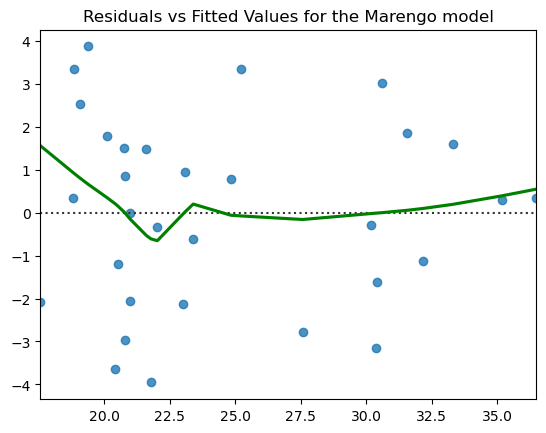

AttributeError: 'OLSResults' object has no attribute 'resids'

In [91]:
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan

# Residuals vs. fitted values plot
fitted_values = modelM.fittedvalues
sns.residplot(x=fitted_values, y=modelM.resid, lowess=True, line_kws={'color': 'green'})
plt.title('Residuals vs Fitted Values for the Marengo model')
plt.show()

# Breusch-Pagan test
bp_test = het_breuschpagan(modelM.resids, model.model.exog)
print(f'Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}')

## Test for Normality

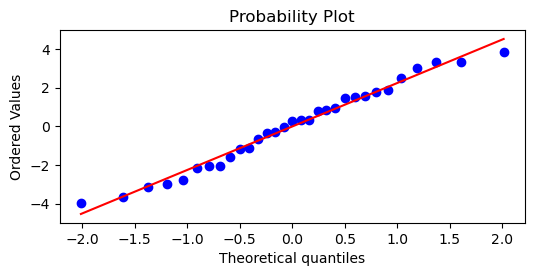

In [92]:
#Normality
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(modelM.resid, plot=ax, fit=True);

C:\Users\user\AppData\Local\Temp\ipykernel_11368\3730480496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modelM.resid, hist=True, kde=True);


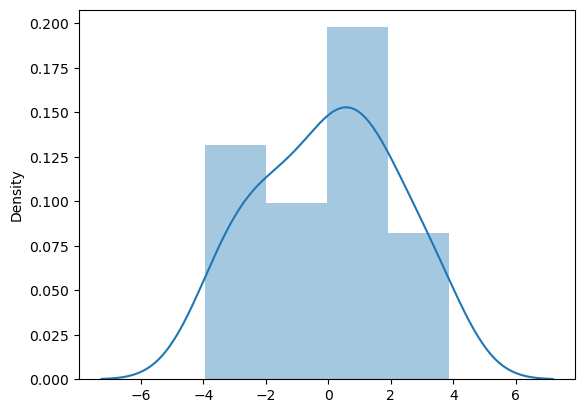

In [93]:
sns.distplot(modelM.resid, hist=True, kde=True);

###  The above plot depicts almost bell shaped curve indicating that the values are normally distributed

In [94]:
# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(modelM.resid)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat}, p-value = {shapiro_p}")

# Kolmogorov-Smirnov Test
# (We assume residuals are tested against a normal distribution with mean 0 and standard deviation 1)
ks_stat, ks_p = kstest(modelM.resid, 'norm', args=(modelM.resid.mean(), modelM.resid.std()))
print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat}, p-value = {ks_p}")

# Anderson-Darling Test
ad_result = anderson(modelM.resid, dist='norm')
print(f"Anderson-Darling Test: Statistic = {ad_result.statistic}")
print("Critical values:", ad_result.critical_values)
print("Significance levels:", ad_result.significance_level)

Shapiro-Wilk Test: Statistic = 0.9717198014259338, p-value = 0.5675449371337891
Kolmogorov-Smirnov Test: Statistic = 0.08522896783756789, p-value = 0.963678003683098
Anderson-Darling Test: Statistic = 0.22843428804130994
Critical values: [0.522 0.595 0.713 0.832 0.99 ]
Significance levels: [15.  10.   5.   2.5  1. ]


### As the p-value of Shapiro-Wilk Test and Kolmogorov-Smirnov Test is > 0.05 hence we fail to reject the null hypothesis therefore the data is normally distributed
### Also the t-statistics of the Anderson-Darling Test is less that the critical value at 5 % level of significance i.e. 0.713 hence it proves the normality 

## Test for Multicolleniarity 

In [95]:
x.values

array([[  1. ,  42.5,   9.3, 199.4],
       [  1. ,  36. ,   9.7, 235.2],
       [  1. ,  54.7,  16.6, 240.8],
       [  1. ,  42.7,  11.7, 232.5],
       [  1. ,  44.9,  13.7, 188.8],
       [  1. ,  35.5,   9.6, 184.2],
       [  1. ,  51.3,  13.7, 207.7],
       [  1. ,  30.4,  12.6, 249.5],
       [  1. ,  38.4,  16.2, 175.8],
       [  1. ,  32.2,   9.6, 245.6],
       [  1. ,  59.4,  11.3, 223.3],
       [  1. ,  50.8,  13.6, 240. ],
       [  1. ,  57.5,  13.5, 250. ],
       [  1. ,  44.6,  11.1, 247.4],
       [  1. ,  34.6,  14.1, 192. ],
       [  1. ,  56.4,  13.4, 201.2],
       [  1. ,  41.4,  12.8, 193.3],
       [  1. ,  53.7,  16. , 202. ],
       [  1. ,  44.8,  12.7, 208.9],
       [  1. ,  32.4,  13.6, 176.9],
       [  1. ,  40.9,  11.6, 218.2],
       [  1. ,  44.1,  11.4, 190. ],
       [  1. ,  46.6,  16.3, 176.8],
       [  1. ,  31.4,  14.5, 178.9],
       [  1. ,  54.7,  14.3, 192.3],
       [  1. ,  37.9,   9.4, 184.1],
       [  1. ,  52.9,  15.3, 240.3],
 

In [96]:
x.shape[1]

4

In [97]:
x.columns

Index(['const', 'Price\n(in lakh rupees)', 'Mileage\n(Km/ltr)',
       'Top speed (Km/hr)'],
      dtype='object')

In [98]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif_factor,features
0,115.565519,const
1,1.232176,Price\n(in lakh rupees)
2,1.184425,Mileage\n(Km/ltr)
3,1.090848,Top speed (Km/hr)


### Since the VIF factor for all the independent variables in < 5 hence they are free from multicollniarity 

## Test for Autocorrelation

In [99]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation
dw_stat = durbin_watson(modelM.resid)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.6492894303731782


### The Durbin-Watson statistic is 1.649 suggests that there is slightly positive to no autocorrelation in the residuals

## Test for specification Bias

In [100]:
from statsmodels.stats.outliers_influence import reset_ramsey

# Ramsey RESET test
reset_test = reset_ramsey(modelM, degree=3)
print(f'Ramsey RESET test statistic: {reset_test.fvalue}, p-value: {reset_test.pvalue}')

Ramsey RESET test statistic: 0.3919691193068531, p-value: 0.6798051582842308


### Since the p-value is higher than 0.05, it suggests that the model is correctly specified, and there are no serious specification errors.

## Hat Diagonal test

In [101]:
# Get the influence measures (hat diagonal)
influence = modelM.get_influence()
hat_values = influence.hat_matrix_diag

# Set a threshold for identifying high-leverage points (rule of thumb: 2*(k+1)/n, where k = number of predictors)
n = len(Mmodel)
k = x.shape[1] - 1  # number of predictors excluding the intercept
leverage_threshold = 2 * (k + 1) / n

# Identify high-leverage points
high_leverage_points = np.where(hat_values > leverage_threshold)[0]

print(f"High leverage points (outliers in X): {high_leverage_points}")

High leverage points (outliers in X): [7]


### The output indicates that observation 7 is identified as a high leverage point in the dataset, this point may have an extreme value in one or more predictor variables compared to the other observations.

In [103]:
Mmodel

,Cars,"Sales \n(in 1,000 units)",Price\n(in lakh rupees),Mileage\n(Km/ltr),Top speed (Km/hr)
0,Marengo 1,20.896,42.5,9.3,199.4
1,Marengo 2,31.048,36.0,9.7,235.2
2,Marengo 3,29.904,54.7,16.6,240.8
3,Marengo 4,28.792,42.7,11.7,232.5
4,Marengo 5,16.776,44.9,13.7,188.8
5,Marengo 6,18.928,35.5,9.6,184.2
6,Marengo 7,22.776,51.3,13.7,207.7
7,Marengo 8,36.824,30.4,12.6,249.5
8,Marengo 9,22.216,38.4,16.2,175.8
9,Marengo 10,35.456,32.2,9.6,245.6


### Marengo 8 is having the least price and a high top speed compared to other models also it is one of the highest selling models, hence it might have been identified as a high leverage point

## Studentized Test

In [102]:
# Get the studentized residuals
studentized_residuals = influence.resid_studentized_external

# Set a threshold for identifying outliers in Y (commonly used threshold: |residual| > 3)
student_residuals_threshold = 3

# Identify outliers in the dependent variable
outliers_in_y = np.where(np.abs(studentized_residuals) > student_residuals_threshold)[0]

print(f"Outliers in Y (studentized residuals): {outliers_in_y}")

Outliers in Y (studentized residuals): []


### The output indicates that there are no outliers in the response variable(Y)

## Q-5) Based on the sales prediction, calculate the overall projected profit for the Rocinante36 and Marengo32 models, respectively?

## Overall projected profit for the Rocinate36  model 

In [104]:
## Total Profit 
## Profit = (Price - Cost of Production)* projected Sales quantity 
Projected_Sales_quantity= 225
Price = 7
Cost_of_Production = 6

In [105]:
Profit = (7-6)*225
Profit

225

## Therefore overall projected profit that the Random motors can make by selling the Rocinate 36 model is 225 Lakh

## Overall projected profit for the Marengo32 Model 

In [106]:
## Total Profit 
## Profit = (Price - Cost of Production)* projected Sales quantity 
Sales_quantity= 25
Price= 41
Cost_of_Production = 33

In [107]:
Profit_1 = (41-33)* 25
Profit_1

200

## Therefore the overall projected profit that the Random Motors can make by producing Marengo 32 model is 200 lakh

## Q-6) Your company wishes to invest only in the model that can generate high overall profits. In which of the two models, Rocinante36 and Marengo32, should your company invest?

### Therefore it is better to produce the Rocinate36 model as the overall projected profit is more for rocinate model compared to the Marengo model 

## Q-7) You must have developed the regression equation for both the models, Rocinante36 and Marengo32. Suppose you increase the price of Rocinante36 and Marengo32 by ₹1 lakh each. Which of the two models will have to see a higher impact on sales numbers? Provide proper logic for your answer. (Note: You can assume that all the other specifications, such as mileage and top speed, are the same for both models.)

## The regression equation for the Rocinate and Marengo model are:
## Sales_R = 50.7231 - 0.7950* Price + 8.3063* Milage - 0.0186* Top speed
## Sales_M = -13.4476 -0.1867 * Price +0.0413 *Milage + 0.2208 *Top speed

### The original sales number of Rocinate and Marengo models

In [109]:
Sales_R = 50.7231 - 0.7950 * 7 +8.3063 * 22  - 0.0186 * 140
Sales_M = -13.4476 -0.1867 * 41 +0.0413 * 15 + 0.2208 * 210
Sales_R, Sales_M

(225.2927, 25.8852)

### The changes in sales number by increasing the price by 1 lakh for both the models keeping milage and top speed the same

In [110]:
Sales_R1 = 50.7231 - 0.7950 * 8 +8.3063 * 22  - 0.0186 * 140
Sales_R2 = -13.4476 -0.1867 * 42 +0.0413 * 15 + 0.2208 * 210
Sales_R1,Sales_R2

(224.4977, 25.6985)

### Therefore the Rocinate36 model will have a larger impact on the sales number as compared to the Marengo32 model because majority of the buyers for Rocinate model belong to the middle class economy and are price concious and are budget oriented hence a small changes in the price can lead to reduction in the demand and inturn the sales number reduces

## Q-8) After developing the regression equation for both the models (Rocinante36 and Marengo32), if you analyse the p-values for the coefficients in the regression results, you will notice that some of the regression variables (top speed, mileage and price) are insignificant. Drop the insignificant regression variables and rebuild the regression model using only significant variables.Compare the adjusted R-squared value for both the new and the old regression models. Do you notice any change in the adjusted R-squared value? If yes, explain the reason for the change.

## For Rocinate 36 Model 
### The p value for the individual variable is >0.05 for top speed hence we accept the null hypothesis for top speed i.e it does not have significant impact on sales whereas the price and milage with p-value < 0.05 have a significant impact on the sales

### Dropping the Top speed variable and rebuilding the Rocinate 36 Model 

In [111]:
y = Rmodel['Sales \n(in 1,000 units)']
x = Rmodel[['Price\n(in lakh rupees)','Mileage\n(Km/ltr)']]

In [112]:
x = sm.add_constant(x)

In [113]:
modelR = sm.OLS(y,x).fit()
modelR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Sales 
(in 1,000 units)   R-squared:                       0.996
Model:                                 OLS   Adj. R-squared:                  0.995
Method:                      Least Squares   F-statistic:                     3718.
Date:                     Sat, 26 Oct 2024   Prob (F-statistic):           1.29e-38
Time:                             19:15:36   Log-Likelihood:                -77.017
No. Observations:                       35   AIC:                             160.0
Df Residuals:                           32   BIC:                             164.7
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     47.7800      2.113     22.608      0.000      43.475      52.085
Price
(in lakh rupees)    -0.7829      0.251     -3.119      0.004      -1.294      -0.272
Mileage
(Km/ltr)           8.2945      0.097     85.257      0.000       8.096       8.493
==============================================================================
Omnibus:                        1.906   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.567
Skew:                           0.509   Prob(JB):                        0.457
Kurtosis:                       2.805   Cond. No.                         91.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The adjusted R square value for the previous model and new model is same i.e. 0.995 hence it indicates that the variable was not contributing for the explanatory power of the independent variables

## For Marengo 32 model 

### The p value for the individual variable is >0.05 for milage hence we accept the null hypothesis for milage i.e it does not have significant impact on sales whereas the price and top speed with p-value < 0.05 have a significant impact on the sales

## Dropping the milage variable and rebuilding the Marengo 32 model

In [115]:
y = Mmodel['Sales \n(in 1,000 units)']
x = Mmodel[['Price\n(in lakh rupees)','Top speed (Km/hr)']]

In [116]:
x = sm.add_constant(x)
modelM = sm.OLS(y,x).fit()
modelM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Sales 
(in 1,000 units)   R-squared:                       0.863
Model:                                 OLS   Adj. R-squared:                  0.853
Method:                      Least Squares   F-statistic:                     88.10
Date:                     Sat, 26 Oct 2024   Prob (F-statistic):           8.30e-13
Time:                             19:26:54   Log-Likelihood:                -67.779
No. Observations:                       31   AIC:                             141.6
Df Residuals:                           28   BIC:                             145.9
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12.9701      3.694     -3.511      0.002     -20.536      -5.404
Price
(in lakh rupees)    -0.1825      0.050     -3.627      0.001      -0.286      -0.079
Top speed (Km/hr)          0.2201      0.017     13.254      0.000       0.186       0.254
==============================================================================
Omnibus:                        2.394   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.258
Skew:                          -0.059   Prob(JB):                        0.533
Kurtosis:                       2.020   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The adjusted R square value for the previous model is 0.848 and new model is 0.853 indicating that explanatory power of the independent variables has increased after dropping the variable shows that it was not contributing significantly to the model and now the model fit has improved